In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def modifydata(train):
    fillzero = ['MasVnrArea',
                'GarageYrBlt', 
                'GarageArea', 
                'GarageCars', 
                'BsmtFinSF1', 
                'BsmtFinSF2', 
                'BsmtUnfSF',
                'TotalBsmtSF', 
                'BsmtFullBath', 
                'BsmtHalfBath']
    train[fillzero]=train[fillzero].replace(np.nan,0)
    
    fillnovalue = ['PoolQC', 
                'MiscFeature',
                'Alley',
                'Fence',
                'FireplaceQu',
                'GarageType', 
                'GarageFinish', 
                'GarageQual', 
                'GarageCond',
                'BsmtQual', 
                'BsmtCond', 
                'BsmtExposure', 
                'BsmtFinType1', 
                'BsmtFinType2',
                'MasVnrType',
                'MSSubClass']
    train[fillnovalue]=train[fillnovalue].replace(np.nan,'No Value')
    
    #Fill Mode
    fillmode = ['MSZoning', 
                'Electrical',
                'KitchenQual',
                'Exterior1st',
                'Exterior2nd',
                'SaleType']
    
    for column in fillmode:
        train[column] = train[column].fillna(train[column].mode()[0])
    
    #Fill Median with Neighborhood
    train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))
    
    newcolumns = []
    #Remove Outliers
    try:
        train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
    except:
        pass
    
               
    train = train.drop(columns=['Utilities'])
    
    train["Functional"] = train["Functional"].fillna("Typ")
    
    #divided columns
    dividecolumns = [('LotFrontage', 'LotArea'), 
                     ('GrLivArea', 'LotArea')]
    for column in dividecolumns:
        train[column[0] + '/' + column[1]] = train[column[0]]/train[column[1]]
        m = train.loc[train[column[0] + '/' + column[1]] != np.inf, column[0] + '/' + column[1]].max()
        train[column[0] + '/' + column[1]].replace(np.inf,m,inplace=True)
        newcolumns.append(column[0] + '/' + column[1])
        
    #year subtract columns
    yearcolumns = ['YearBuilt', 'YearRemodAdd', 'YrSold']
    for column in yearcolumns:
        train[column + 'Subtracted'] = 1/(datetime.today().year - train[column])
        newcolumns.append(column + 'Subtracted')
    
    #Square columns
    squarecolumns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
    squarecolumns.extend(newcolumns)
    for column in squarecolumns:
        train[column + 'Squared'] = train[column] ** 2
        newcolumns.append(column + 'Squared')
        
    #Log columns
#     logcolumns = squarecolumns
#     logcolumns.extend(newcolumns)
#     for column in logcolumns:
#         train[column + 'Logged'] = np.log10(train[column])
#         newcolumns.append(column + 'Logged')
#     train = train.replace(-np.inf, 0)
    
    #0 columns

    
    
    
    
    return train



In [3]:
train = pd.read_csv('train.csv')
train = modifydata(train)
train.to_csv('traincleaned.csv')
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,OpenPorchSFSquared,EnclosedPorchSquared,ScreenPorchSquared,PoolAreaSquared,MiscValSquared,LotFrontage/LotAreaSquared,GrLivArea/LotAreaSquared,YearBuiltSubtractedSquared,YearRemodAddSubtractedSquared,YrSoldSubtractedSquared
0,1,60,RL,65.0,8450,Pave,No Value,Reg,Lvl,Inside,...,3721,0,0,0,0,0.000059,0.040952,0.003906,0.003906,0.008264
1,2,20,RL,80.0,9600,Pave,No Value,Reg,Lvl,FR2,...,0,0,0,0,0,0.000069,0.017281,0.000541,0.000541,0.006944
2,3,60,RL,68.0,11250,Pave,No Value,IR1,Lvl,Inside,...,1764,0,0,0,0,0.000037,0.025203,0.003086,0.003460,0.008264
3,4,70,RL,60.0,9550,Pave,No Value,IR1,Lvl,Corner,...,1225,73984,0,0,0,0.000039,0.032325,0.000092,0.000416,0.005917
4,5,60,RL,84.0,14260,Pave,No Value,IR1,Lvl,FR2,...,7056,0,0,0,0,0.000035,0.023758,0.002770,0.002770,0.008264


In [4]:
train = pd.read_csv('test.csv')
train = modifydata(train)
train.to_csv('testcleaned.csv')
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,OpenPorchSFSquared,EnclosedPorchSquared,ScreenPorchSquared,PoolAreaSquared,MiscValSquared,LotFrontage/LotAreaSquared,GrLivArea/LotAreaSquared,YearBuiltSubtractedSquared,YearRemodAddSubtractedSquared,YrSoldSubtractedSquared
0,1461,20,RH,80.0,11622,Pave,No Value,Reg,Lvl,Inside,...,0,0,14400,0,0,0.000047,0.005944,0.000297,0.000297,0.012346
1,1462,20,RL,81.0,14267,Pave,No Value,IR1,Lvl,Corner,...,1296,0,0,0,156250000,0.000032,0.008677,0.000269,0.000269,0.012346
2,1463,60,RL,74.0,13830,Pave,No Value,IR1,Lvl,Inside,...,1156,0,0,0,0,0.000029,0.013874,0.002066,0.002268,0.012346
3,1464,60,RL,78.0,9978,Pave,No Value,IR1,Lvl,Inside,...,1296,0,0,0,0,0.000061,0.025842,0.002268,0.002268,0.012346
4,1465,120,RL,43.0,5005,Pave,No Value,IR1,HLS,Inside,...,6724,0,20736,0,0,0.000074,0.065405,0.001372,0.001372,0.012346


In [6]:
fillzero = ['LotFrontage',
                'MasVnrArea',
                'GarageYrBlt', 
                'GarageArea', 
                'GarageCars', 
                'BsmtFinSF1', 
                'BsmtFinSF2', 
                'BsmtUnfSF',
                'TotalBsmtSF', 
                'BsmtFullBath', 
                'BsmtHalfBath']
x=0

LotFrontage


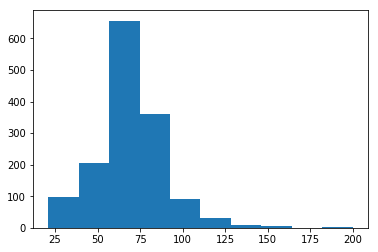

In [7]:
try:
    print(fillzero[x])
    plt.hist(train[fillzero[x]].tolist())
    x+=1
except:
    x+=1

MSSubClass


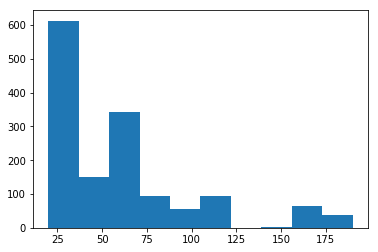

In [8]:
try:
    print(train.columns[x])
    plt.hist(train[train.columns[x]].tolist())
    x+=1
except:
    x+=1

In [18]:
inputs = pd.read_csv('traincleaned.csv')
testinputs = pd.read_csv('testcleaned.csv')

inputs = inputs.drop(columns=['SalePrice'])
alldata = pd.concat([inputs, testinputs])
alldata.set_index('Id', inplace=True)
alldata = alldata.fillna(0)
alldata = pd.get_dummies(alldata)
alldata = alldata.drop(columns=['Unnamed: 0'])

inputs = alldata.loc[0:1460,]
inputs = inputs.values

testinputs = alldata.loc[1461:]
testinputs = testinputs.values

In [19]:
prices = pd.read_csv('traincleaned.csv')
prices = prices['SalePrice']
prices = np.array(prices).reshape(-1,1)
prices

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(inputs, prices,test_size=0.33, random_state=42)

In [21]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

In [22]:
model_xgb = xgb.XGBRegressor(n_estimators=350, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.8363769598389583

In [23]:
model_xgb.fit(inputs, prices)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=350, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [25]:
model_xgb.score(inputs, prices)

0.9663417151720805

In [26]:
pred =model_xgb.predict(testinputs)
pred 

array([118633.95, 164589.08, 180655.42, ..., 164843.3 , 120850.29,
       242819.7 ], dtype=float32)

In [27]:
submittest = pd.read_csv('testcleaned.csv')
submittest = submittest[['Id']]
submittest['SalePrice'] = pred
submittest.to_csv('SKsubmission5.csv',index = False)
submittest

,Id,SalePrice
0,1461,118633.953125
1,1462,164589.078125
2,1463,180655.421875
3,1464,184618.812500
4,1465,198793.796875
5,1466,175823.843750
6,1467,167443.187500
7,1468,165871.437500
8,1469,199790.593750
9,1470,127471.640625
